In [2]:
import math
from matplotlib import pyplot as plt

In [3]:
import json
import subprocess

In [4]:
with open("cv/checkpoint_46000.json") as f:
    data = json.load(f)

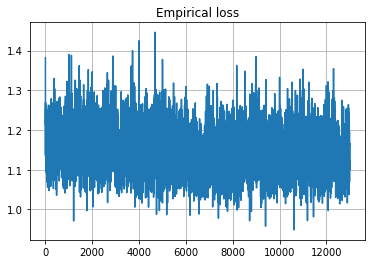

In [5]:
plt.plot(data['train_loss_history'])
plt.title("Empirical loss")
# plt.xlim(0,1000)
plt.grid()

In [6]:
def writer(init, n=2000, temperature=0.5, checkpoint=46000):
    n_chk = checkpoint
    start_text = init
    if temperature<0.1:
        sample=0
    else:
        sample=1
#     temperature = 0.5
    cmd = f"cd ~/torch-rnn && /home/jovyan/torch/install/bin/th sample.lua  -checkpoint ../cv/checkpoint_{n_chk}.t7 -length {n} -gpu -1 -sample {sample} -temperature {temperature} -start_text \"{start_text}\""
    res = subprocess.check_output(cmd, shell=True, universal_newlines=True)
    return res

In [7]:
from ipywidgets import *
from matplotlib import pyplot as plt
label = Label("Easy speech generator", layout=Layout(width='80%'))
textarea = Textarea(layout=Layout(width='80%', height="50%"))
fslider = FloatSlider(description="Policy relevance", orientation='horizontal', layout=Layout(width='80%'))
islider = IntSlider(50,1,2000,description="Speed", orientation='horizontal', layout=Layout(width='80%'))

button = Button(description="Write")

gui = VBox([    label,
    textarea,
    fslider,
    islider,
    button
], layout=Layout(width='100%', height="50%"))
gui

VBox(children=(Label(value='Easy speech generator', layout=Layout(width='80%')), Textarea(value='', layout=Layout(height='50%', width='80%')), FloatSlider(value=0.0, description='Policy relevance', layout=Layout(width='80%')), IntSlider(value=50, description='Speed', layout=Layout(width='80%'), max=2000, min=1), Button(description='Write', style=ButtonStyle())), layout=Layout(height='50%', width='100%'))

In [7]:
def write_it():
    init = textarea.value
    init = str.strip(init)
    init = init.replace("\n", " ")
    init = init.replace("\t", " ")
    n = islider.value
    temperature = fslider.value/100
    seniority = 46000
    new_text = writer(init, n=n+len(init), temperature=temperature, checkpoint=seniority)
    textarea.value = new_text

In [8]:
button.on_click(lambda s: write_it())

In [10]:
print(writer("Good evening"))

Good evening of the Monetary Policy Break 2011).

All speeches are available online at www.bankofengland.co.uk/publications/Pages/speeches/default.aspx

All speeches are available online at www.bankofengland.co.uk/publications/Pages/speeches/default.aspx

The previous sector that possible the advanced economic shocks and the pre-crisis lending and easing to support with losses and the contracts of the future and the crisis in the economy is not a possible particularly record of the UK has been expected to reduce the community of
combination of the 1970s and monthly lending about the internal growth in the economy and comments to increased in the last countries are experienced the country of the other challenge for the contract of the outlook for the recovery of the shock of the safety and the really respond to some level of monetary policy to sometimes not faced on the compensation of the same bank depressing banking sector financial services and complexity of our developments in the p